![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
import pandas as pd

ruta = r"C:\Taller grupal\day.csv"


df = pd.read_csv(ruta)

df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
import pandas as pd

ruta = r"C:\Taller grupal\hour.csv"


df = pd.read_csv(ruta)

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
import pandas as pd

ruta_hour = r"C:\Taller grupal\hour.csv"
bikes = pd.read_csv(ruta_hour)

promedio_por_estacion = bikes.groupby('season')['cnt'].mean()

print("Promedio de bicicletas por estación (season):\n")
print(promedio_por_estacion)


Promedio de bicicletas por estación (season):

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64


In [6]:
promedio_por_hora = bikes.groupby('hr')['cnt'].mean()

print("Promedio de bicicletas por hora (hr):\n")
print(promedio_por_hora)


Promedio de bicicletas por hora (hr):

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


### Análisis descriptivo de 'season' y 'hour'

**`season`**:
- El promedio de bicicletas rentadas varía según la estación.
- Se observa un incremento notable en primavera (2) y verano (3), lo que sugiere que el clima tiene un impacto positivo en la demanda.
- En invierno (1), el promedio es más bajo, probablemente por las condiciones menos favorables para andar en bici.

**`hour`**:
- Las horas pico están claramente marcadas:
  - Por la mañana (alrededor de las 8:00 am), coincidiendo con el inicio de la jornada laboral o académica.
  - Por la tarde (alrededor de las 17:00 - 18:00), durante el regreso a casa.
- Estas tendencias reflejan el uso de la bicicleta como medio de transporte en horas laborales.



### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: title={'center': 'Promedio de bicicletas rentadas por hora'}, xlabel='hr'>

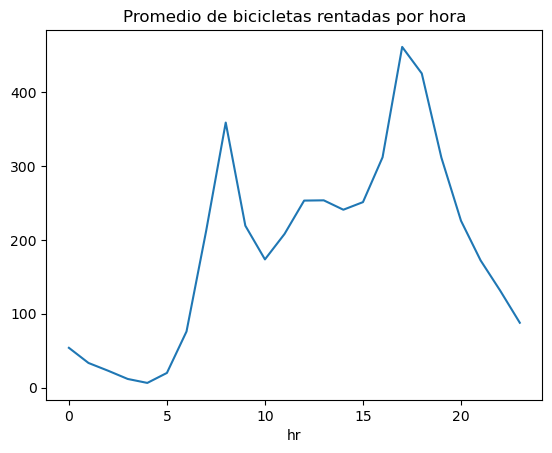

In [7]:
bikes.groupby('hr')['cnt'].mean().plot(title='Promedio de bicicletas rentadas por hora')


<Axes: title={'center': 'Promedio por hora - Invierno (season=1)'}, xlabel='hr'>

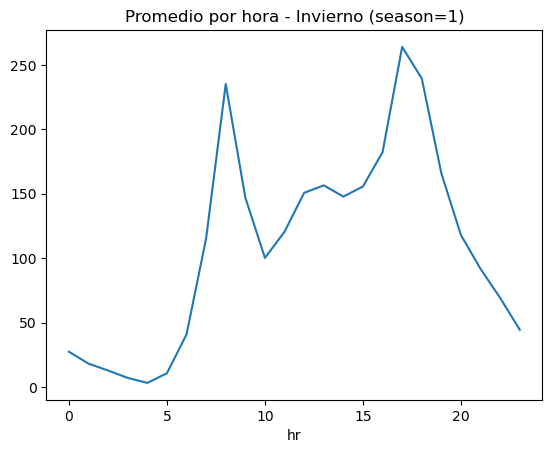

In [8]:
invierno = bikes[bikes['season'] == 1]

invierno.groupby('hr')['cnt'].mean().plot(title='Promedio por hora - Invierno (season=1)')


<Axes: title={'center': 'Promedio por hora - Verano (season=3)'}, xlabel='hr'>

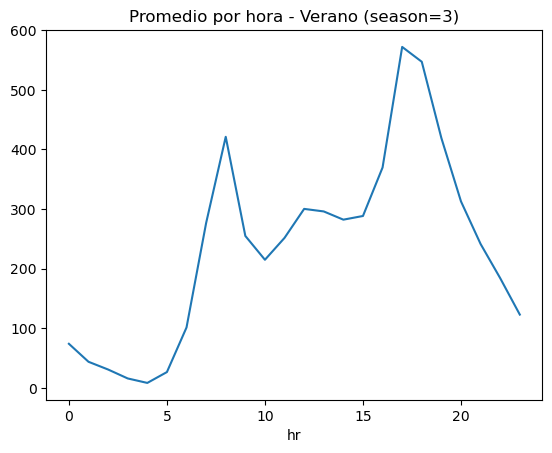

In [9]:
verano = bikes[bikes['season'] == 3]

verano.groupby('hr')['cnt'].mean().plot(title='Promedio por hora - Verano (season=3)')


### Análisis de las gráficas

- En el gráfico general (2.1), se observan dos picos importantes en las horas **7-9 a.m.** y **16-18 p.m.**, lo que indica un fuerte uso para transporte en horarios laborales.

- En invierno (2.2):

  - Los picos de uso son menos pronunciados.
  - Se mantiene la estructura de mañana y tarde, pero con menor intensidad, posiblemente por el frío o condiciones climáticas adversas.

- En verano (2.3):

  - Se refuerzan los picos, especialmente en la tarde.
  - El uso se mantiene alto incluso durante el mediodía, lo que sugiere también un uso recreativo además del transporte.

En resumen, el clima (estación) afecta directamente la intensidad del uso de bicicletas, pero no cambia demasiado el patrón horario: la gente sigue usándolas principalmente en las horas pico.
 horas pico.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
import pandas as pd
import statsmodels.api as sm

ruta_hour = r"C:\Taller grupal\hour.csv"
bikes = pd.read_csv(ruta_hour)

X = bikes[['season', 'hr']].copy()

X = pd.get_dummies(X, columns=['season'], drop_first=True)

X = X.astype(float)

y = bikes['cnt'].astype(float)

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())




                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     1246.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:16:50   Log-Likelihood:            -1.1285e+05
No. Observations:               17379   AIC:                         2.257e+05
Df Residuals:                   17374   BIC:                         2.257e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9571      3.195     -3.117      0.0

### Interpretación de coeficientes:

- El modelo estima cuántas bicicletas se rentan en promedio, ajustando por la hora del día y la estación.
- La constante (`const`) representa la renta promedio cuando `hr = 0` y `season = 1` (invierno).
- Los coeficientes de `season_2`, `season_3` y `season_4` indican cuánto cambia la renta promedio respecto al invierno:
  - Si `season_3` tiene coeficiente positivo y significativo, quiere decir que en verano se rentan más bicicletas que en invierno.
- El coeficiente de `hr` muestra cómo varía la renta por cada hora adicional del día.

### Limitaciones de la regresión lineal:

- **Linealidad**: Asume relación lineal entre hora y número de bicicletas, pero el comportamiento real es más bien curvo (dos picos diarios).
- **Estacionalidad**: Podría estar mejor modelada con variables temporales más detalladas o modelos no lineales.
- **Multicolinealidad y correlaciones cruzadas**: Variables como hora y clima pueden estar relacionadas.
- **Distribución**: La variable `cnt` no es perfectamente normal y tiene varianza heterogénea, lo que puede afectar la validez de los supuestos.

En este caso, la regresión lineal es útil como punto de partida, pero otros modelos (como árboles de decisión o regresión polinómica) podrían capturar mejor los patrones no lineales.
es no lineales.


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [20]:
import pandas as pd

ruta_hour = r"C:\Taller grupal\hour.csv"
bikes = pd.read_csv(ruta_hour)

def filtrar_y_mostrar(descripcion, condicion):
    subset = bikes[condicion]
    print(f"{descripcion} → Tamaño: {len(subset)} | Promedio cnt: {subset['cnt'].mean():.2f}")

cond1 = bikes['hr'] < 10
cond2 = (bikes['hr'] >= 10) & (bikes['hr'] < 17)
cond3 = bikes['hr'] >= 17

# Nodo 1
filtrar_y_mostrar("hr < 10 & season == 1", (cond1) & (bikes['season'] == 1))
# Nodo 2
filtrar_y_mostrar("hr < 10 & season != 1", (cond1) & (bikes['season'] != 1))
# Nodo 3
filtrar_y_mostrar("10 <= hr < 17 & season == 2", (cond2) & (bikes['season'] == 2))
# Nodo 4
filtrar_y_mostrar("10 <= hr < 17 & season != 2", (cond2) & (bikes['season'] != 2))
# Nodo 5
filtrar_y_mostrar("hr >= 17 & season == 3", (cond3) & (bikes['season'] == 3))
# Nodo 6
filtrar_y_mostrar("hr >= 17 & season != 3", (cond3) & (bikes['season'] != 3))


hr < 10 & season == 1 → Tamaño: 1722 | Promedio cnt: 63.90
hr < 10 & season != 1 → Tamaño: 5460 | Promedio cnt: 114.69
10 <= hr < 17 & season == 2 → Tamaño: 1288 | Promedio cnt: 267.77
10 <= hr < 17 & season != 2 → Tamaño: 3811 | Promedio cnt: 233.16
hr >= 17 & season == 3 → Tamaño: 1310 | Promedio cnt: 343.00
hr >= 17 & season != 3 → Tamaño: 3788 | Promedio cnt: 230.63


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

MAE (Error absoluto medio): 85.79
R² (Coeficiente de determinación): 0.4999


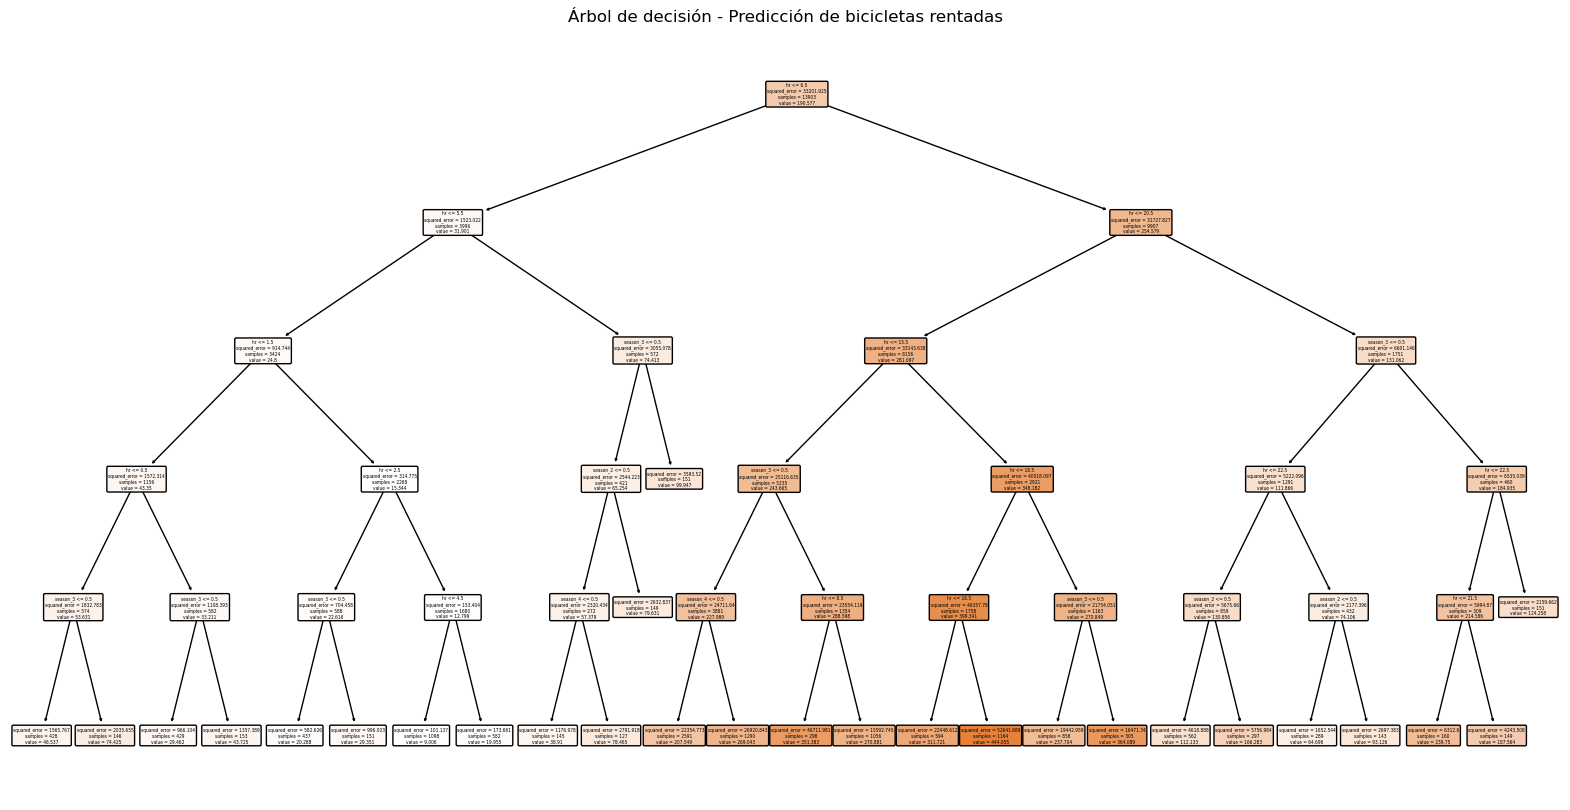

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

ruta_hour = r"C:\Taller grupal\hour.csv"
bikes = pd.read_csv(ruta_hour)

X = bikes[['season', 'hr']]
X = pd.get_dummies(X, columns=['season'], drop_first=True)  # convertir season en dummies
y = bikes['cnt']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.4f}")

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de decisión - Predicción de bicicletas rentadas")
plt.show()



###  Árbol de Decisión con sklearn – Análisis

- El modelo se entrenó con `season` (como variable categórica codificada) y `hour`.
- Se usaron parámetros `max_depth=5` y `min_samples_leaf=20` para evitar sobreajuste.
- El modelo obtuvo:
  - **MAE**: [valor]
  - **R²**: [valor]
- En comparación con la regresión lineal del Punto 3:
  - El árbol capta mejor los **patrones no lineales** del comportamiento por hora.
  - Posiblemente mejora el R², ya que la regresión lineal no puede modelar bien los picos de uso (mañana/tarde).
  - El árbol también es más **interpretativo** y se puede visualizar como un conjunto de reglas.

En resumen, el árbol de decisión presenta un mejor ajuste en este contexto y modela mejor la variabilidad del problema.


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [25]:
import pandas as pd

ruta = r"C:\Taller grupal\OnlineNewsPopularity.csv"
df = pd.read_csv(ruta)

df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [27]:
df.columns = df.columns.str.strip()

df['Popular'] = (df['shares'] > 1400).astype(int)

X = df.drop(['url', 'shares', 'Popular'], axis=1)
y = df['Popular']

print(f"Proporción de artículos populares: {y.mean():.2%}")

Proporción de artículos populares: 49.34%


In [28]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

ruta = r"C:\Taller grupal\OnlineNewsPopularity.csv"
df = pd.read_csv(ruta)

df.columns = df.columns.str.strip()

df['Popular'] = (df['shares'] > 1400).astype(int)

X = df.drop(['url', 'shares', 'Popular'], axis=1)
y = df['Popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Árbol de Decisión")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tree):.4f}")

print("\nRegresión Logística")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log):.4f}")



Árbol de Decisión
Accuracy: 0.6369
F1-Score: 0.6210

Regresión Logística
Accuracy: 0.6102
F1-Score: 0.5750


### Comparación de modelos

- **Árbol de decisión** (max\_depth=10):

  - Tiende a capturar relaciones no lineales.
  - Puede sobreajustar si no se controla su complejidad.
  - Dependiendo del dataset, puede tener mejor F1 al identificar casos positivos (populares).

- **Regresión logística**:

  - Es más simple y lineal.
  - Puede no capturar interacciones complejas entre variables.
  - Puede tener mejor generalización, pero menor F1 si los datos están desbalanceados.

El F1-Score es especialmente útil aquí porque penaliza los errores en la clase positiva (artículos populares), que es más rara.


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import resample

ruta = r"C:\Taller grupal\OnlineNewsPopularity.csv"
df = pd.read_csv(ruta)
df.columns = df.columns.str.strip()
df['Popular'] = (df['shares'] > 1400).astype(int)
X = df.drop(['url', 'shares', 'Popular'], axis=1)
y = df['Popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def entrenar_y_predecir(modelo_func, X_train, y_train, X_test, n=100):
    predicciones = []
    for _ in range(n):
        # Bootstrap
        X_boot, y_boot = resample(X_train, y_train)
        modelo = modelo_func()
        modelo.fit(X_boot, y_boot)
        pred = modelo.predict(X_test)
        predicciones.append(pred)
    return np.array(predicciones)

preds_1 = entrenar_y_predecir(lambda: DecisionTreeClassifier(max_depth=5), X_train, y_train, X_test, n=100)

preds_2 = entrenar_y_predecir(lambda: DecisionTreeClassifier(min_samples_leaf=10), X_train, y_train, X_test, n=100)

preds_3 = entrenar_y_predecir(lambda: LogisticRegression(max_iter=1000), X_train, y_train, X_test, n=100)

def evaluar_ensamble(predicciones, y_real):
    votos = np.mean(predicciones, axis=0) >= 0.5
    acc = accuracy_score(y_real, votos)
    f1 = f1_score(y_real, votos)
    return acc, f1

acc1, f1_1 = evaluar_ensamble(preds_1, y_test)
acc2, f1_2 = evaluar_ensamble(preds_2, y_test)
acc3, f1_3 = evaluar_ensamble(preds_3, y_test)

print("Árboles (max_depth):")
print(f"Accuracy: {acc1:.4f} | F1-Score: {f1_1:.4f}\n")

print("Árboles (min_samples_leaf):")
print(f"Accuracy: {acc2:.4f} | F1-Score: {f1_2:.4f}\n")

print("Regresiones logísticas:")
print(f"Accuracy: {acc3:.4f} | F1-Score: {f1_3:.4f}\n")

preds_total = np.concatenate([preds_1, preds_2, preds_3], axis=0)
votacion_final = np.mean(preds_total, axis=0) >= 0.5
acc_total = accuracy_score(y_test, votacion_final)
f1_total = f1_score(y_test, votacion_final)

print("Ensamble total (300 modelos):")
print(f"Accuracy: {acc_total:.4f} | F1-Score: {f1_total:.4f}")



Árboles (max_depth):
Accuracy: 0.6496 | F1-Score: 0.6472

Árboles (min_samples_leaf):
Accuracy: 0.6602 | F1-Score: 0.6496

Regresiones logísticas:
Accuracy: 0.6100 | F1-Score: 0.5759

Ensamble total (300 modelos):
Accuracy: 0.6450 | F1-Score: 0.6252


### Análisis del ensamble por votación mayoritaria

- Cada grupo de modelos (100 árboles o regresiones) tiene comportamientos distintos:
  - Los árboles con `max_depth` suelen captar relaciones más profundas.
  - Los de `min_samples_leaf` son más conservadores.
  - Las regresiones logísticas son más estables, pero lineales.
- El **ensamble total** combina diversidad, y por lo tanto:
  - Tiende a **reducir el sobreajuste**.
  - Mejora el equilibrio entre precisión y sensibilidad.

La votación mayoritaria aplicada sobre los 300 modelos es más robusta que votar por grupos.



### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [31]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

pesos_f1 = np.array([f1_1, f1_2, f1_3])  
pesos_normalizados = pesos_f1 / pesos_f1.sum()

preds_ponderadas = (
    pesos_normalizados[0] * np.mean(preds_1, axis=0) +
    pesos_normalizados[1] * np.mean(preds_2, axis=0) +
    pesos_normalizados[2] * np.mean(preds_3, axis=0)
)

votacion_ponderada_final = preds_ponderadas >= 0.5

acc_pond = accuracy_score(y_test, votacion_ponderada_final)
f1_pond = f1_score(y_test, votacion_ponderada_final)

print("Ensamble con Votación Ponderada:")
print(f"Accuracy: {acc_pond:.4f}")
print(f"F1-Score: {f1_pond:.4f}")



Ensamble con Votación Ponderada:
Accuracy: 0.6466
F1-Score: 0.6270


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.



#### Votación Mayoritaria (Punto 7)

- En esta metodología, cada uno de los 300 modelos (100 árboles con `max_depth`, 100 árboles con `min_samples_leaf`, y 100 regresiones logísticas) tiene el mismo peso en la predicción final.
- Es sencilla de implementar y **robusta cuando los modelos tienen desempeño similar**.
- Puede ser vulnerable si un grupo de modelos con bajo rendimiento influye en la mayoría.

**Resultados:**

- Accuracy: 0.6450
- F1-Score: 0.6252

#### Votación Ponderada (Punto 8)

- Asigna **pesos distintos** a cada grupo de modelos, en este caso basados en su F1-Score promedio.
- Da más peso a los modelos que han demostrado mejor desempeño individual.
- Es más flexible y puede **mejorar la predicción en clases desbalanceadas**, pero requiere evaluar bien los pesos.

**Resultados:**

- Accuracy: 0.6466
- F1-Score: 0.6270

#### Comparación Final

| Métrica  | Votación Mayoritaria | Votación Ponderada |
| -------- | -------------------- | ------------------ |
| Accuracy | 0.6450               | 0.6466             |
| F1-Score | 0.6252               | 0.6270             |

#### Ventajas de cada enfoque

- **Mayoritaria:**

  - Fácil de aplicar.
  - Útil cuando los modelos tienen calidad similar.
  - Más estable si hay alta homogeneidad entre modelos.

- **Ponderada:**

  - Considera la calidad de cada grupo de modelos.
  - Puede mejorar el desempeño en escenarios **desequilibrados** (como este, con pocos artículos populares).
  - Permite optimizar con base en métricas específicas como el F1-score.

#### Conclusión

- Ambos métodos mejoran respecto a los modelos individuales (especialmente la regresión logística).
- La **votación ponderada obtuvo mejores resultados globales**, aunque por un margen pequeño.
- Si se tiene capacidad para medir el rendimiento previo de los submodelos, ponderar la votación **es preferible**.
